In [2]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_auc_score, roc_curve, auc, f1_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import math
import joypy
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 
from sklearn.feature_selection import SelectFromModel
from datetime import datetime
import matplotlib.ticker as ticker
from matplotlib.legend_handler import HandlerLine2D
#import ray 


from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, precision_recall_curve, precision_recall_fscore_support


# py -m pip install matplotlib

In [3]:
df_private = pd.read_csv('df_private_dummies.txt', sep="\t")

In [4]:
X = df_private.drop(columns=['Churn']) 
y = df_private['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

X_train_ht, X_test_ht, y_train_ht, y_test_ht = train_test_split(X_train, y_train, stratify=y_train, test_size=0.8, random_state=42)

In [5]:
df_train = pd.read_csv('train_data.txt', sep='\t')

X_train = df_train.drop('Churn', axis=1)  
y_train = df_train['Churn']              

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75898 entries, 0 to 75897
Data columns (total 86 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Vehicle_age                                   75898 non-null  float64
 1   GWP                                           75898 non-null  float64
 2   number_of_claims                              75898 non-null  float64
 3   Renewal                                       75898 non-null  int64  
 4   Policy_Duration                               75898 non-null  float64
 5   Client_Age                                    75898 non-null  float64
 6   Years_of_driving                              75898 non-null  float64
 7   PRODUCT_MOD                                   75898 non-null  float64
 8   PRODUCT_MTPL                                  75898 non-null  float64
 9   Duration_Long                                 75898 non-null 

In [5]:
df_test = pd.read_csv('test_data.txt', sep='\t')

X_test = df_test.drop('Churn', axis=1)  
y_test = df_test['Churn']   

In [6]:
f1_scorer = make_scorer(f1_score, greater_is_better = True)

In [72]:
# X = df_private.drop(columns=['Churn']) 
# y = df_private['Churn']

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [35]:
from sklearn.metrics import make_scorer, recall_score

recall_scorer = make_scorer(recall_score)

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 4, 6, 10, 15, 20],
    'min_samples_leaf': [1, 3, 5, 8, 10, 12, 15],
    'criterion': ['gini', 'entropy', 'log_loss'],
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, cv=5, scoring=f1_scorer, random_state=42)

random_search.fit(X_train, y_train)

print("Best Parameters found:")
print(random_search.best_params_)

print("Best cross-validation accuracy: {:.3f}".format(random_search.best_score_))

# Best Parameters found:
# {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 70, 'criterion': 'entropy'}
# Best cross-validation accuracy: 0.801

# Best Parameters found:
# {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 30, 'criterion': 'gini'}
# Best cross-validation accuracy: 0.786

Best Parameters found:
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 30, 'criterion': 'gini'}
Best cross-validation accuracy: 0.817


Accuracy: 0.965654862282181
F1: 0.7998034076015728
AUC: 0.9325478729557881


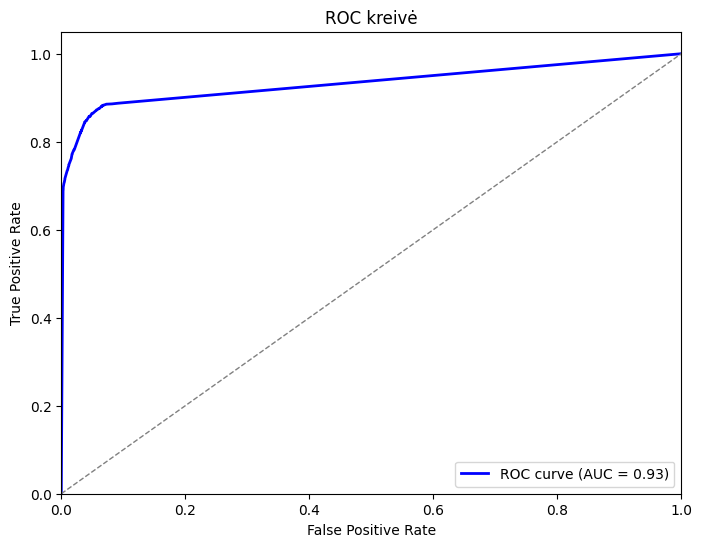

In [41]:

best_model = RandomForestClassifier(
    bootstrap=False,
    criterion='gini',
    max_depth=30,
    max_features=None,
    min_samples_leaf=3,
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred)
print("F1:", f1)

y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)
print("AUC:", auc_score)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

# Accuracy: 0.9726389572060994
# F1: 0.7613941018766756
# AUC: 0.8661730658478719

#### ENN

In [22]:
df_enn = pd.read_csv('train_data_enn.txt', sep='\t')

mode_value = df_enn['Renewal'].mode()[0]  
df_enn['Renewal'].fillna(mode_value, inplace=True)

X_train_enn = df_enn.drop('Churn', axis=1)  
y_train_enn = df_enn['Churn']              

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_4824\611726456.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_enn['Renewal'].fillna(mode_value, inplace=True)


In [36]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 4, 6, 10, 15, 20],
    'min_samples_leaf': [1, 3, 5, 8, 10, 12, 15],
    'criterion': ['gini', 'entropy', 'log_loss'],
}

rf = RandomForestClassifier(random_state=42)

random_search_enn = RandomizedSearchCV(rf, param_distributions=param_dist, cv=5, scoring=f1_scorer, random_state=42)

random_search_enn.fit(X_train_enn, y_train_enn)

print("Best Parameters found:")
print(random_search_enn.best_params_)

print("Best cross-validation accuracy: {:.3f}".format(random_search_enn.best_score_))

# # Best Parameters found:
# # {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 70, 'criterion': 'entropy'}
# # Best cross-validation accuracy: 0.806

# Best Parameters found:
# {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 30, 'criterion': 'gini'}
# Best cross-validation accuracy: 0.827

Best Parameters found:
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 30, 'criterion': 'gini'}
Best cross-validation accuracy: 0.827


Accuracy: 0.961495222034851
F1: 0.7613941018766756
AUC: 0.9337534403383848


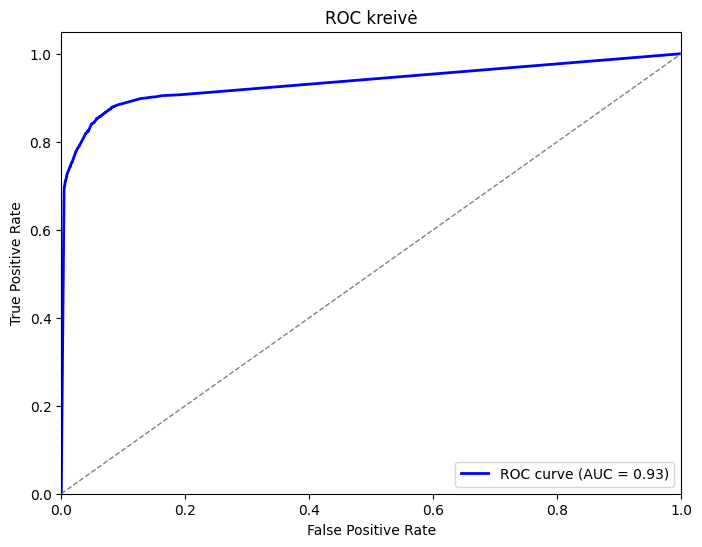

In [40]:

best_model_enn = RandomForestClassifier(
    bootstrap=False,
    criterion='gini',
    max_depth=30,
    max_features=None,
    min_samples_leaf=3,
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)

best_model_enn.fit(X_train_enn, y_train_enn)

y_pred_enn = best_model_enn.predict(X_test)

accuracy_enn = accuracy_score(y_test, y_pred_enn)
print("Accuracy:", accuracy_enn)

f1_enn = f1_score(y_test, y_pred_enn)
print("F1:", f1)

y_prob_enn = best_model_enn.predict_proba(X_test)[:, 1]
fpr_enn, tpr_enn, thresholds_enn = roc_curve(y_test, y_prob_enn)
auc_score_enn = auc(fpr_enn, tpr_enn)
print("AUC:", auc_score_enn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_enn, tpr_enn, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_enn)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

# Accuracy: 0.948413674372848
# F1: 0.7613941018766756
# AUC: 0.7643516310165449

### SMOTE

In [25]:
df_sm = pd.read_csv('train_data_sm.txt', sep='\t')

mode_value = df_sm['Renewal'].mode()[0]  
df_sm['Renewal'].fillna(mode_value, inplace=True)

X_train_sm = df_sm.drop('Churn', axis=1)  
y_train_sm = df_sm['Churn']              

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_4824\1975131443.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sm['Renewal'].fillna(mode_value, inplace=True)


In [28]:
df_sm = pd.read_csv('train_data_sm.txt', sep='\t')


mode_value = df_sm['Renewal'].mode()[0]  
df_sm['Renewal'].fillna(mode_value, inplace=True)

X_train_sm = df_sm.drop('Churn', axis=1)  
y_train_sm = df_sm['Churn'] 

X_train_sm_ht, X_test_sm_ht, y_train_sm_ht, y_test_sm_ht = train_test_split(X_train_sm, y_train_sm, stratify=y_train_sm, test_size=0.6, random_state=42)

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_4824\2477837855.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sm['Renewal'].fillna(mode_value, inplace=True)


In [26]:
X_train_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150816 entries, 0 to 150815
Data columns (total 85 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Vehicle_age                                   150816 non-null  float64
 1   GWP                                           150816 non-null  float64
 2   number_of_claims                              150816 non-null  float64
 3   Renewal                                       150816 non-null  float64
 4   Policy_Duration                               150816 non-null  float64
 5   Client_Age                                    150816 non-null  float64
 6   Years_of_driving                              150816 non-null  float64
 7   PRODUCT_MOD                                   150816 non-null  float64
 8   PRODUCT_MTPL                                  150816 non-null  float64
 9   Duration_Long                                 15

In [14]:
y_train_sm.value_counts()

Churn
0    75408
1    75408
Name: count, dtype: int64

In [34]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 4, 6, 10, 15, 20],
    'min_samples_leaf': [1, 3, 5, 8, 10, 12, 15],
    'criterion': ['gini', 'entropy', 'log_loss'],
}

rf = RandomForestClassifier(random_state=42)

random_search_sm = RandomizedSearchCV(rf, param_distributions=param_dist, cv=5, scoring=f1_scorer, random_state=42)

random_search_sm.fit(X_train_sm, y_train_sm)

print("Best Parameters found:")
print(random_search_sm.best_params_)

print("Best cross-validation accuracy: {:.3f}".format(random_search_sm.best_score_))

# # Best Parameters found:
# # {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'criterion': 'gini'}
# # Best cross-validation accuracy: 0.978


# {'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40, 'criterion': 'gini'}
# Best cross-validation accuracy: 0.975

Best Parameters found:
{'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40, 'criterion': 'gini'}
Best cross-validation accuracy: 0.974


Accuracy: 0.9678471051152333
F1: 0.8116562397102404
AUC: 0.9582332950577092


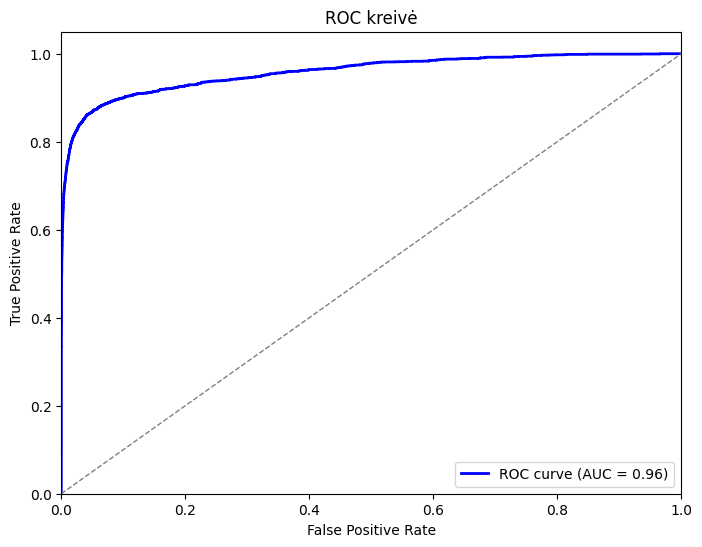

In [39]:

best_model_sm = RandomForestClassifier(
    bootstrap=True,
    criterion='gini',
    max_depth=40,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=15,
    n_estimators=100,
    random_state=42
)

best_model_sm.fit(X_train_sm, y_train_sm)

y_pred_sm = best_model_sm.predict(X_test)

accuracy_sm = accuracy_score(y_test, y_pred_sm)
print("Accuracy:", accuracy_sm)

f1_sm = f1_score(y_test, y_pred_sm)
print("F1:", f1_sm)

y_prob_sm = best_model_sm.predict_proba(X_test)[:, 1]
fpr_sm, tpr_sm, thresholds_sm = roc_curve(y_test, y_prob_sm)
auc_score_sm = auc(fpr_sm, tpr_sm)
print("AUC:", auc_score_sm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_sm, tpr_sm, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_sm)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()


# Accuracy: 0.9678471051152333
# F1: 0.8116562397102404
# AUC: 0.9582332950577092


### SMOTE - Tomek

In [6]:
df_smt = pd.read_csv('train_data_smt.txt', sep='\t')

X_train_smt = df_smt.drop('Churn', axis=1)  
y_train_smt = df_smt['Churn']              

In [37]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 4, 6, 10, 15, 20],
    'min_samples_leaf': [1, 3, 5, 8, 10, 12, 15],
    'criterion': ['gini', 'entropy', 'log_loss'],
}

rf = RandomForestClassifier(random_state=42)

random_search_smt = RandomizedSearchCV(rf, param_distributions=param_dist, cv=5, scoring=f1_scorer, random_state=42)

random_search_smt.fit(X_train_smt, y_train_smt)

print("Best Parameters found:")
print(random_search_smt.best_params_)

print("Best cross-validation accuracy: {:.3f}".format(random_search_smt.best_score_))

# # Best Parameters found:
# # 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'criterion': 'gini'}
# # Best cross-validation accuracy: 0.979

# Best Parameters found:
# {'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40, 'criterion': 'gini'}
# Best cross-validation accuracy: 0.976

Best Parameters found:
{'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40, 'criterion': 'gini'}
Best cross-validation accuracy: 0.976


Accuracy: 0.9716132658797078
F1: 0.8313293253173013
AUC: 0.9607261874818561


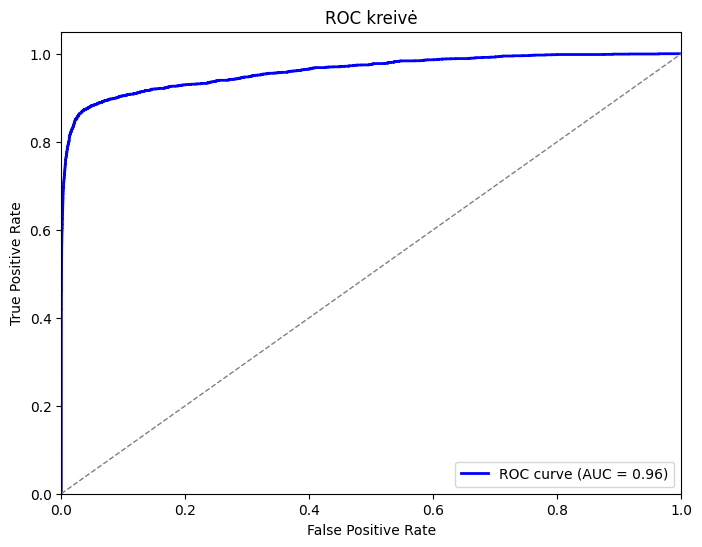

In [7]:

best_model_smt = RandomForestClassifier(
    bootstrap=False,
    criterion='gini',
    max_depth=40,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=15,
    n_estimators=100,
    random_state=42
)

best_model_smt.fit(X_train_smt, y_train_smt)

y_pred_smt = best_model_smt.predict(X_test)

accuracy_smt = accuracy_score(y_test, y_pred_smt)
print("Accuracy:", accuracy_smt)

f1_smt = f1_score(y_test, y_pred_smt)
print("F1:", f1_smt)

y_prob_smt = best_model_smt.predict_proba(X_test)[:, 1]
fpr_smt, tpr_smt, thresholds_smt = roc_curve(y_test, y_prob_smt)
auc_score_smt = auc(fpr_smt, tpr_smt)
print("AUC:", auc_score_smt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_smt, tpr_smt, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_score_smt)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()

# Accuracy: 0.9735405422172592
# F1: 0.7712523464735854
# AUC: 0.9446938118832047


In [9]:
feat_importances = pd.Series(best_model_smt.feature_importances_, index=X_train.columns)

city_columns = [col for col in X_train.columns if 'City' in col]
city_distributions = X_train[city_columns].mean() 

weighted_importances_city = feat_importances[city_columns] * city_distributions

average_importance_city = weighted_importances_city.sum()         

print("Combined Feature Importance for 'City':", average_importance_city)

Combined Feature Importance for 'City': 0.007506905484994392


In [10]:
feat_importances = pd.Series(best_model_smt.feature_importances_, index=X_train.columns)

type_columns = [col for col in X_train.columns if 'vehicle_type' in col]
type_distributions = X_train[type_columns].mean() 

weighted_importances_type = feat_importances[type_columns] * type_distributions

average_importance_type = weighted_importances_type.sum()

print("Combined Feature Importance for 'type':", average_importance_type)

Combined Feature Importance for 'type': 0.005981232619147168


In [11]:
feat_importances = pd.Series(best_model_smt.feature_importances_, index=X_train.columns)

Duration_columns = [col for col in X_train.columns if 'Duration' in col]
Duration_distributions = X_train[Duration_columns].mean() 

weighted_importances_Duration = feat_importances[Duration_columns] * Duration_distributions

average_importance_Duration = weighted_importances_Duration.sum()

print("Combined Feature Importance for 'type':", average_importance_Duration)

Combined Feature Importance for 'type': 0.10965204454955196


In [12]:
feat_importances = pd.Series(best_model_smt.feature_importances_, index=X_train.columns)

PRODUCT_columns = [col for col in X_train.columns if 'PRODUCT' in col]
PRODUCT_distributions = X_train[PRODUCT_columns].mean() 

weighted_importances_PRODUCT = feat_importances[PRODUCT_columns] * PRODUCT_distributions

average_importance_PRODUCT = weighted_importances_PRODUCT.sum()

print("Combined Feature Importance for 'type':", average_importance_PRODUCT)

Combined Feature Importance for 'type': 0.008600079116642881


In [13]:
feat_importances = pd.Series(best_model_smt.feature_importances_, index=X_train.columns)

Make_columns = [col for col in X_train.columns if 'Make' in col]
Make_distributions = X_train[Make_columns].mean() 

weighted_importances_Make = feat_importances[Make_columns] * Make_distributions

average_importance_Make = weighted_importances_Make.sum()

print("Combined Feature Importance for 'type':", average_importance_Make)

Combined Feature Importance for 'type': 0.004697904552589311


In [14]:
feat_importances = pd.Series(best_model_smt.feature_importances_, index=X_train.columns)

Gender_columns = [col for col in X_train.columns if 'Gender' in col]
Gender_distributions = X_train[Gender_columns].mean() 

weighted_importances_Gender = feat_importances[Gender_columns] * Gender_distributions

average_importance_Gender = weighted_importances_Gender.sum()

print("Combined Feature Importance for 'type':", average_importance_Gender)

Combined Feature Importance for 'type': 0.006170730948793621


In [15]:
feat_importances = pd.Series(best_model_smt.feature_importances_, index=X_train.columns)

Channel_columns = [col for col in X_train.columns if 'Channel' in col]
Channel_distributions = X_train[Channel_columns].mean() 

weighted_importances_Channel = feat_importances[Channel_columns] * Channel_distributions

average_importance_Channel = weighted_importances_Channel.sum()

print("Combined Feature Importance for 'type':", average_importance_Channel)

Combined Feature Importance for 'type': 0.00871783497120337


In [16]:
filtered_importances = feat_importances[~feat_importances.index.str.startswith('City_')]
filtered_importances = filtered_importances[~filtered_importances.index.str.startswith('Duration_')]
filtered_importances = filtered_importances[~filtered_importances.index.str.startswith('vehicle_type_')]
filtered_importances = filtered_importances[~filtered_importances.index.str.startswith('PRODUCT_')]
filtered_importances = filtered_importances[~filtered_importances.index.str.startswith('Make_')]
filtered_importances = filtered_importances[~filtered_importances.index.str.startswith('Gender_')]
filtered_importances = filtered_importances[~filtered_importances.index.str.startswith('Channel_')]

In [17]:
filtered_importances['average_importance_City'] = average_importance_city
filtered_importances['average_importance_Duration'] = average_importance_Duration
filtered_importances['average_importance_vehicle_type'] = average_importance_type
filtered_importances['average_importance_PRODUCT'] = average_importance_PRODUCT
filtered_importances['average_importance_Make'] = average_importance_Make
filtered_importances['average_importance_Gender'] = average_importance_Gender
filtered_importances['average_importance_Channel'] = average_importance_Channel

In [23]:
filtered_importances

Vehicle_age                        0.056476
GWP                                0.358530
number_of_claims                   0.021152
Renewal                            0.050303
Policy_Duration                    0.128104
Client_Age                         0.048252
Years_of_driving                   0.051768
average_importance_City            0.007507
average_importance_Duration        0.109652
average_importance_vehicle_type    0.005981
average_importance_PRODUCT         0.008600
average_importance_Make            0.004698
average_importance_Gender          0.006171
average_importance_Channel         0.008718
dtype: float64

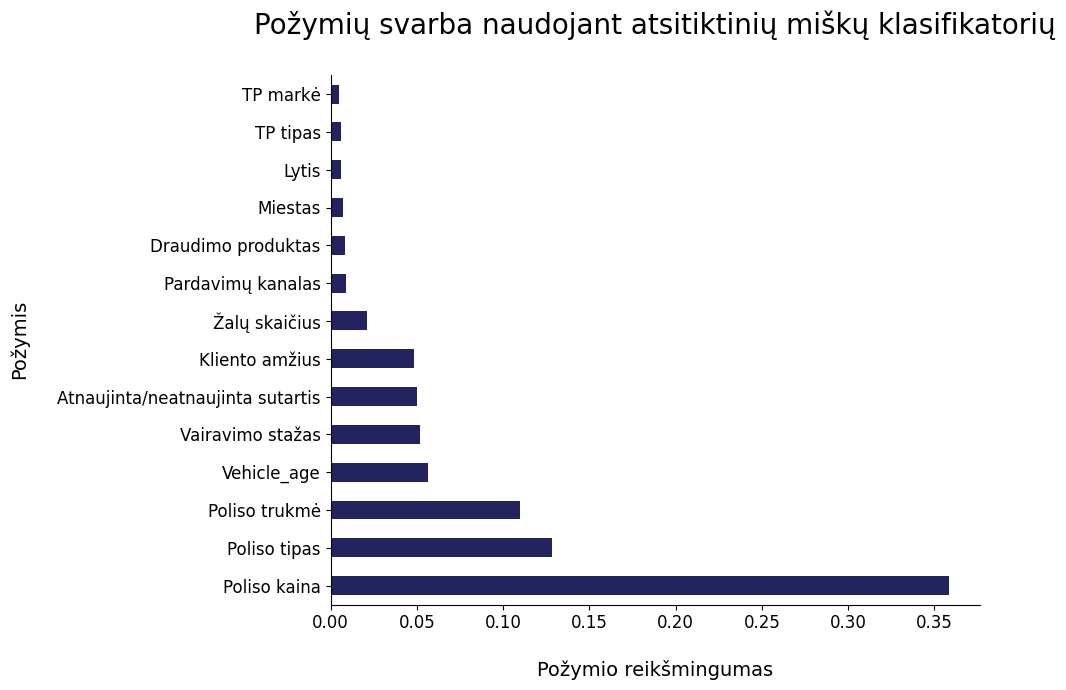

In [42]:

colors = ['#22235F']


new_category_names = {
    'vehicle_age': 'TP amžius',
    'GWP': 'Poliso kaina',
    'number_of_claims': 'Žalų skaičius',
    'Renewal': 'Atnaujinta/neatnaujinta sutartis',
    'Policy_Duration': 'Poliso tipas',
    'Client_Age': 'Kliento amžius',
    'Years_of_driving': 'Vairavimo stažas',
    'average_importance_City': 'Miestas',
    'average_importance_Duration': 'Poliso trukmė',
    'average_importance_vehicle_type': 'TP tipas',
    'average_importance_PRODUCT': 'Draudimo produktas',
    'average_importance_Make': 'TP markė',
    'average_importance_Gender': 'Lytis',
    'average_importance_Channel': 'Pardavimų kanalas'
}


filtered_importances.rename(index=new_category_names, inplace=True)

sorted_importances = filtered_importances.sort_values(ascending=False)

ax = sorted_importances.plot(kind='barh', stacked=False, color=colors, figsize=(10, 7))
plt.title('Požymių svarba naudojant atsitiktinių miškų klasifikatorių', fontsize=20, pad=30)
plt.xlabel('Požymio reikšmingumas', fontsize=14, labelpad=20)
plt.ylabel('Požymis', fontsize=14, labelpad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()


leg = ax.get_legend()
if leg is not None:
    for text in leg.get_texts():
        text.set_color('black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



plt.show()


<Axes: >

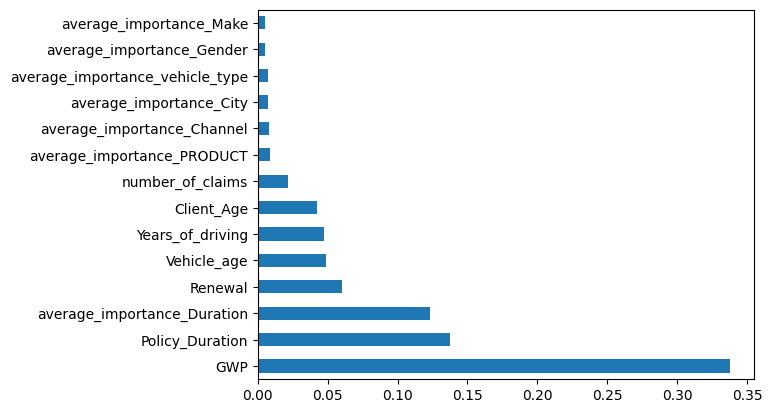

In [166]:
filtered_importances.nlargest(20).plot(kind='barh')

Feature: 0.049000472877272085, Score: 0.04900
Feature: 0.33802444980828966, Score: 0.33802
Feature: 0.021460026984505425, Score: 0.02146
Feature: 0.05986015413294772, Score: 0.05986
Feature: 0.13783219887747536, Score: 0.13783
Feature: 0.0425147847107621, Score: 0.04251
Feature: 0.047187505131019596, Score: 0.04719
Feature: 0.007618621978609986, Score: 0.00762
Feature: 0.12350041893040295, Score: 0.12350
Feature: 0.0070069880539258035, Score: 0.00701
Feature: 0.008898523907501768, Score: 0.00890
Feature: 0.004967420615431653, Score: 0.00497
Feature: 0.005257745310085026, Score: 0.00526
Feature: 0.008069508249791952, Score: 0.00807


C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_33296\2523846001.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Feature: {filtered_importances[i]}, Score: {score:.5f}")


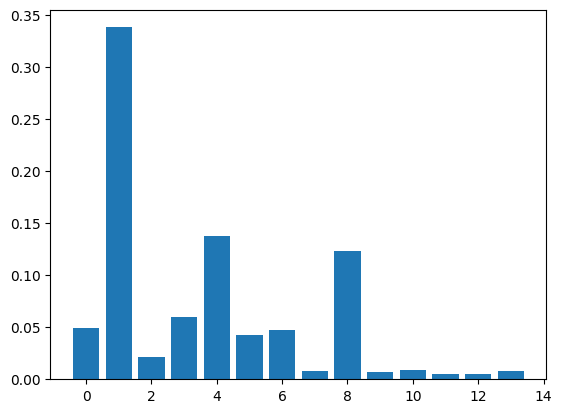

In [170]:
for i, score in enumerate(filtered_importances):
    print(f"Feature: {feature_names[i]}, Score: {score:.5f}")

# Plot feature importance
plt.figure(figsize=(10, 8))  # Set a figure size for better readability
plt.barh(range(len(filtered_importances)), filtered_importances, tick_label=[feature_names[i] for i in range(len(filtered_importances))])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

In [ ]:
feat_importances = pd.Series(best_model_enn.feature_importances_, index=X_train.columns)

Duration_columns = [col for col in X_train.columns if 'Duration' in col]
Duration_distributions = X_train[Duration_columns].mean() 

weighted_importances = feat_importances[type_columns] * type_distributions

average_importance = weighted_importances.sum()

print("Combined Feature Importance for 'type':", average_importance)

In [33]:
type_distributions

vehicle_type_group_mapped_2) Truck over 3,5T    0.000027
vehicle_type_group_mapped_3) Delivery van       0.006983
vehicle_type_group_mapped_4) Full trailer       0.002177
vehicle_type_group_mapped_5) Motorcycle         0.047830
vehicle_type_group_mapped_6) Personal           0.938205
vehicle_type_group_mapped_7) Trailer            0.003996
vehicle_type_group_mapped_8) Tractor            0.000783
dtype: float64

##### MEtrics

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}\n')


accuracy_enn = accuracy_score(y_test, y_pred_enn)
precision_enn = precision_score(y_test, y_pred_enn)
recall_enn = recall_score(y_test, y_pred_enn)
f1_enn = f1_score(y_test, y_pred_enn)

print(f'Accuracy: {accuracy_enn:.4f}')
print(f'Precision: {precision_enn:.4f}')
print(f'Recall: {recall_enn:.4f}')
print(f'F1 Score: {f1_enn:.4f}\n')



accuracy_sm = accuracy_score(y_test, y_pred_sm)
precision_sm = precision_score(y_test, y_pred_sm)
recall_sm = recall_score(y_test, y_pred_sm)
f1_sm = f1_score(y_test, y_pred_sm)

print(f'Accuracy: {accuracy_sm:.4f}')
print(f'Precision: {precision_sm:.4f}')
print(f'Recall: {recall_sm:.4f}')
print(f'F1 Score: {f1_sm:.4f}\n')



accuracy_smt = accuracy_score(y_test, y_pred_smt)
precision_smt = precision_score(y_test, y_pred_smt)
recall_smt = recall_score(y_test, y_pred_smt)
f1_smt = f1_score(y_test, y_pred_smt)

print(f'Accuracy: {accuracy_smt:.4f}')
print(f'Precision: {precision_smt:.4f}')
print(f'Recall: {recall_smt:.4f}')
print(f'F1 Score: {f1_smt:.4f}\n')

Accuracy: 0.9657
Precision: 0.8589
Recall: 0.7483
F1 Score: 0.7998

Accuracy: 0.9615
Precision: 0.8126
Recall: 0.7538
F1 Score: 0.7821

Accuracy: 0.9678
Precision: 0.8766
Recall: 0.7557
F1 Score: 0.8117

Accuracy: 0.9716
Precision: 0.9131
Recall: 0.7630
F1 Score: 0.8313



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_enn = confusion_matrix(y_test, y_pred_enn)
cm_sm = confusion_matrix(y_test, y_pred_sm)
cm_smt = confusion_matrix(y_test, y_pred_smt)

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))  # Increased size for better layout

# Plot each heatmap
sns.heatmap(cm_smt, ax=axes[0, 0], annot=True, fmt="d", cmap="coolwarm", cbar=False)
axes[0, 0].set_title("SMOTE-Tomek")
axes[0, 0].set_xlabel("Spėjama klasė")
axes[0, 0].set_ylabel("Tikra klasė")

sns.heatmap(cm_sm, ax=axes[0, 1], annot=True, fmt="d", cmap="coolwarm", cbar=False)
axes[0, 1].set_title("SMOTE")
axes[0, 1].set_xlabel("Spėjama klasė")
axes[0, 1].set_ylabel("Tikra klasė")

sns.heatmap(cm, ax=axes[1, 0], annot=True, fmt="d", cmap="coolwarm", cbar=False)
axes[1, 0].set_title("Nesubalansuoti")
axes[1, 0].set_xlabel("Spėjama klasė")
axes[1, 0].set_ylabel("Tikra klasė")

sns.heatmap(cm_enn, ax=axes[1, 1], annot=True, fmt="d", cmap="coolwarm", cbar=False)
axes[1, 1].set_title("Edited Nearest Neighbors")
axes[1, 1].set_xlabel("Spėjama klasė")
axes[1, 1].set_ylabel("Tikra klasė")

# Add a common colorbar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
fig.colorbar(axes[0, 0].collections[0], cax=cbar_ax)

# Common title for all plots
fig.suptitle("Sumaišymo matricos", fontsize=24, va='top')

plt.tight_layout(rect=[0, 0, 0.90, 0.97])  # Adjust the layout to make room for the super title
plt.show()

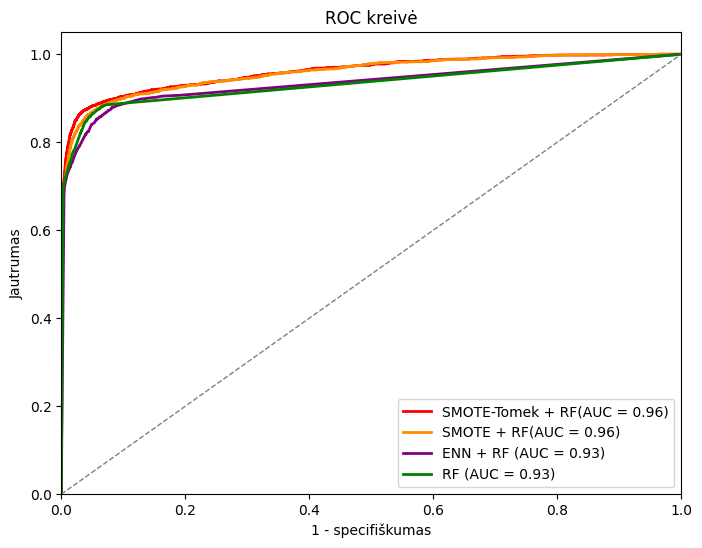

In [47]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_smt, tpr_smt, color='red', lw=2, label='SMOTE-Tomek + RF(AUC = %0.2f)' % auc_score_smt)
plt.plot(fpr_sm, tpr_sm, color='darkorange', lw=2, label='SMOTE + RF(AUC = %0.2f)' % auc_score_sm)
plt.plot(fpr_enn, tpr_enn, color='purple', lw=2, label='ENN + RF (AUC = %0.2f)' % auc_score_enn)
plt.plot(fpr, tpr, color='green', lw=2, label='RF (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specifiškumas')
plt.ylabel('Jautrumas')
plt.title('ROC kreivė')
plt.legend(loc='lower right')
plt.show()